# 독립 표본 t-검정(이표본 검정, Independent two sample T-test)
서로 다른 두개의 그룹 간 평균의 차이가 유의미한지 여부를 판단
## #01. 작업준비

### 패키지 참조


In [2]:
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

## #02. 예제(1) - 지혈제 효과 비교

### 데이터 가져오기

두 종료의 지혈제 효과를 측정한 자료이다.

총 14명이 실험에 참여했으며 두 그룹으로 임의 분할한 후 피부에 작은 상처를 내어 피가 흐르게 한 다음, 한 그룹에는 지혈제 B를, 다른 그룹에는 지혈제 G를 투여하여 완전히 지혈될 때 까지의 시간(분)을 측정하였다.

In [3]:
df = pd.read_excel("https://data.hossam.kr/E02/styptic.xlsx")
df

B     G
0  8.80   9.9
1  8.40   9.0
2  7.90  11.1
3  8.70   9.6
4  9.10   8.7
5  9.60  10.4
6  8.75   9.5

### 두 그룹의 분산 확인

In [4]:
var1= df['B'].var()
var2 = df['G'].var()

var1,var2

(0.2824999999999997, 0.6695238095238097)

### 커널 밀도 그래프
두 그룹의 데이터 분포가 서로 다름이 확인됌

<Axes: xlabel='G', ylabel='Count'>

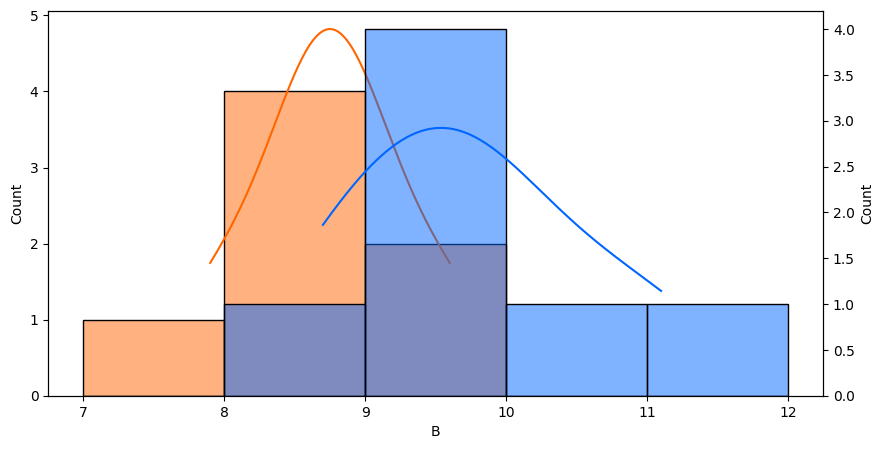

In [6]:
bins = [7,8,9,10,11,12]

fig, ax1 = plt.subplots(1,1,figsize=(10,5))
ax2 = ax1.twinx()
sb.histplot(data=df,x="B",bins=bins,kde=True,ax=ax1,color='#ff6600')
sb.histplot(data=df,x="G",bins=bins,kde=True,ax=ax2,color='#0066ff')
plt.show()
plt.close()

## T-Test 시행
### case1 


귀무가설($H_0$)  : B를 사용한 그룹과 G를 사용한 그룹의 지혈 시간에는 차이가 없다.

대립가설($H_1$)  : B를 사용한 그룹과 G를 사용한 그룹의 지혈 시간에는 차이가 있다.

두 그룹간 평균의 차이가있는지 검정

기본 파라미터로 사용시 equal_var=True, alternative='two-sided'로 설정됨

In [7]:
stats.ttest_ind(df['B'],df['G'])

TtestResult(statistic=-2.69222826574718, pvalue=0.01958895335130418, df=12.0)



### 결과 해석

p값이 0.05보다 작으므로 지혈제 G를 사용한 그룹과 B를 사용한 그룹 간에는 지혈시간에 차이가 있다


### case2 - 등분산 성립 x 

equal_var=False 로 설정

In [8]:
stats.ttest_ind(df['B'],df['G'],equal_var=False)


TtestResult(statistic=-2.69222826574718, pvalue=0.022077570616415278, df=10.29809053849377)

#### 결과해석

p값이 0.05보다 작으므로 지혈제 G를 사용한 그룹과 B를 사용한 그룹 간에는 지혈시간에 차이가 있다


### case3


귀무가설($H_0$)  : 지혈제 B를 사용한 그룹의 평균 지혈시간은 G를 사용한 그룹의 평균 지혈시간보다 크지 않다.

대립가설($H_1$)  :  지혈제 B를 사용한 그룹의 평균 지혈시간은 G를 사용한 그룹의 평균 지혈시간보다 크다.

In [9]:
stats.ttest_ind(df['B'],df['G'],equal_var=False , alternative='greater')

TtestResult(statistic=-2.69222826574718, pvalue=0.9889612146917923, df=10.29809053849377)

#### 결과해석
p값이 0.05보다 크므로 귀무가설 채택. 즉, 지혈제 B를 사용한 그룹의 평균 지혈시간은 G를 사용한 그룹의 평균 지혈시간보다 크지 않다.


### case4


귀무가설($H_0$)  : 지혈제 B를 사용한 그룹의 평균 지혈시간은 G를 사용한 그룹의 평균 지혈시간보다 작지 않다.

대립가설($H_1$)  :  지혈제 B를 사용한 그룹의 평균 지혈시간은 G를 사용한 그룹의 평균 지혈시간보다 작다.

In [10]:
stats.ttest_ind(df['B'],df['G'],equal_var=False,alternative='less')


TtestResult(statistic=-2.69222826574718, pvalue=0.011038785308207639, df=10.29809053849377)

#### 결과해석
p값이 0.05보다 크므로 대립가설 채택. 즉, 지혈제 B를 사용한 그룹의 평균 지혈시간은 G를 사용한 그룹의 평균 지혈시간보다 작다.


## #03. 예제(2) - 인공심장 효과 측정
자료는 두 독립적인 그룹의 심장병 환자에 대한 심장계수(cardiac index)를 측정한 것이다.

그룹 1은 심장수술을 받고 부착한 인공장기의 기능이 정상적인 사람들이고,

그룹 2는 비정상으로 판명된 사람들이다.

심장계수는 수술 직후에 측정하였다.

이 두 그룹의 환자에게 부착한 인공장기의 기능에 따라 심장계수가 서로 차이가 나는지 알고 싶은 것이 이 실험의 목적이다.

(단, 두 그룹은 공통분산 가정에 어긋난다고 가정한다.)원
### 데이터 가져오기

In [12]:
df = pd.read_excel("https://data.hossam.kr/E02/heatrate.xlsx")
df

그룹1   그룹2
0  3.84  3.97
1  2.60  2.50
2  1.19  2.70
3  2.00  3.36
4  6.20  3.55
5  0.96  2.97
6  5.50  3.20
7  3.18  2.30

### case1
두 그룹간 심장계수의 차이가 있는지 검정

귀무가설($H_0$)  : 두 그룹간 심장계수에는 차이가 없다

대립가설($H_1$)  :  두 그룹간 심장계수에는 차이가 있다

In [13]:
stats.ttest_ind(df['그룹1'],df['그룹2'],equal_var=False,alternative='two-sided')

TtestResult(statistic=0.16333115041045673, pvalue=0.8742117697901691, df=8.19961125071249)

#### 결과해석 
p값이 0.05보다 크므로 귀무가설 채택. 즉 그룹1과 그룹 2 간 심장계수의 차이가 서로 나지 않음.

### case 2


$H_0 : 그룹1의 심장계수가 그룹2의 심장계수보다 작지 않다.


$H_1 : 그룹1의 심장계수가 그룹2의 심장계수보다 작다.


In [14]:
stats.ttest_ind(df['그룹1'],df['그룹2'],equal_var=False,alternative="less")

TtestResult(statistic=0.16333115041045673, pvalue=0.5628941151049154, df=8.19961125071249)

#### 결과해석 
p값이 0.05보다 크므로 귀무가설 채택. 즉 그룹1과 그룹 2 간 심장계수의 차이가 서로 나지 않음.

### case 3

$H_0 : 그룹1의 심장계수가 그룹2의 심장계수보다 크지 않다


$H_1 : 그룹1의 심장계수가 그룹2의 심장계수보다 크다


In [15]:
stats.ttest_ind(df['그룹1'],df['그룹2'],equal_var=False,alternative="greater")

TtestResult(statistic=0.16333115041045673, pvalue=0.43710588489508456, df=8.19961125071249)

#### 결과해석 
p값이 0.05보다 크므로 귀무가설 채택. 즉 그룹1과 그룹 2 간 심장계수의 차이가 서로 나지 않음.